# Overfitting and Underfitting

In [1]:
from IPython.display import Image

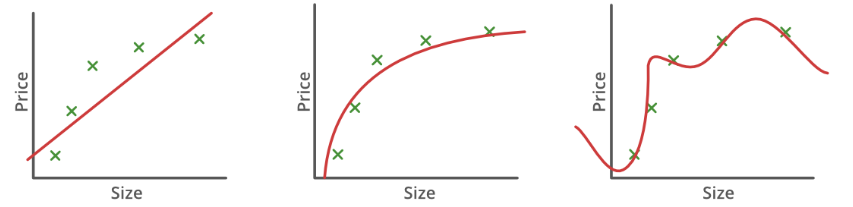

In [2]:
Image('Example.png')

In the given image, the 1st diagram represents an "Underfit" condition, 2nd diagram represents a robust or a good model, and the 3rd diagram represents an "Overfit" condition

When the model performs very well in the train set of a given data, and not on the test set, this is called as an overfit condition. When the models performs very well in the test set of the given data, and not on the train set (actually doesn't perform well on both train and test), this is called an underfit condition

## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
#set current working dir
os.chdir('C:/Users/user/Desktop/Classification/Ann/Logistic/Overfit_Underfit/')


In [4]:
#read input dataset
random=pd.read_csv('mtcars.csv')
random.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
# variable model is not needed for analysis and lets remove it
df = random.drop("model", axis = 1) # axis = 1 refers to column
df.head() 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Overfit - High Variance and low Bias

When a model fits the train data very well when compared to test data

In [9]:
from sklearn.model_selection import train_test_split

# lets remove the target variable mpg
X = df.drop('mpg', axis=1)
y = df['mpg'] # store only the target variable in y

In [10]:
#split the data into Train and test 70% and 30% respectively
X_train, X_test, y_train,  y_test = train_test_split(X,y , 
                                                     test_size = 0.30 , 
                                                     random_state = 1 )

In [11]:
#Build a simple Linear regression
from sklearn.linear_model import LinearRegression

# create instance
model = LinearRegression() 

#Build the model with train dataset
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
#Predict the value with test dataset
y_pred = model.predict(X_test)

In [10]:
# Calculate the Train Score and Test score which will give the details about the model accuracy/''
print('train score:',model.score(X_train,y_train))

print('test score:',model.score(X_test,y_test))

train score: 0.918075736168842
test score: 0.6986516223548618


In [11]:
model.coef_

array([ 0.05642263,  0.00913237, -0.0191569 ,  1.26952627, -2.29502804,
        0.22435961, -0.85832351, -0.4642907 ,  2.57751704, -0.87829683])

In [12]:

model.intercept_

12.521343823205273

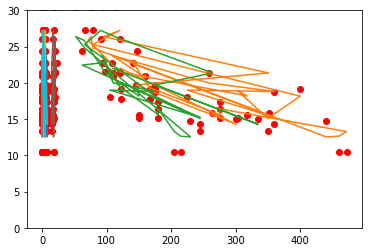

In [13]:
a = np.dot(X, model.coef_.transpose()) + model.intercept_
plt.plot(X, y, 'ro', X, a)
axes = plt.gca()
axes.set_ylim([0, 30])
plt.show()

As the train is more than test, it is an overfit condition. We can also see from the graph that the model memorizes the data

In [13]:
### Calculate error

In [14]:
from sklearn.metrics import mean_squared_error

from math import sqrt

In [15]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
rmse

4.684658694635352

### Inference : 

Model score for Train data set is high compared to test dataset.
Mean, data worked very well for the train data but not for the test

## Reducing the overfit problem

In [16]:
X_train, X_test, y_train,  y_test = train_test_split(X,y , test_size = 0.30 , random_state = 1 )

In [17]:
from sklearn.linear_model import Ridge    # Using Ridge

In [18]:
model1 = Ridge()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [19]:
rmse1 = sqrt(mean_squared_error(y_test,y_pred))
rmse1

4.6639377542728155

In [20]:
print('train score:',model1.score(X_train,y_train))
print('test score:',model1.score(X_test,y_test))

train score: 0.9090271752368948
test score: 0.7013115438595318


## Underfit - High bias and low Variance
When a model fits the test data very well when compare to the train data

In [14]:
dfn = pd.read_excel('Sample.xlsx')
dfn.head()

,A,B
0,22908,1459
1,22270,1477
2,21529,1447
3,24427,1459
4,20659,1456


In [15]:
y = dfn[['A']]
X = dfn[['B']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Train Score is: ",model.score(X_train, y_train))
print("Test Score is: ",model.score(X_test, y_test))

Train Score is:  0.31708616227445885
Test Score is:  0.5878412738150252


In [36]:
model.coef_

array([[17.70414633]])

In [37]:

model.intercept_

array([-2929.27186873])

### Inference : 

Model score for Train data set is low compared to test dataset.
Mean, data worked very well for the test data but not for the train.